## 1. Content Type Analysis: Examine the distribution of movies vs. TV shows.

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


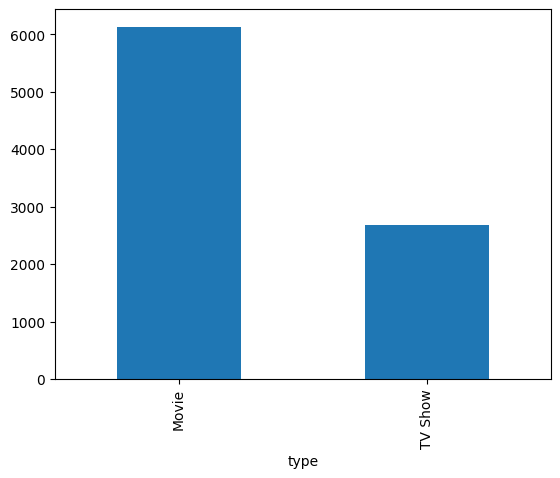

In [6]:
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv("netflix_dataset.csv")

type_distribution = df['type'].value_counts()
print(type_distribution)

type_distribution.plot(kind='bar')
plt.show()


### Patterns:
- There are significantly more movies (6131) than TV shows (2676) available in this dataset.
- The number of movies is more than double the number of TV shows, suggesting that Netflix has a stronger focus on movies in their catalog.

### Insights:
- This could indicate a content strategy that prioritizes movies, possibly due to higher demand or better viewer retention.
- It's also possible that the production and acquisition costs, along with licensing agreements, might be more favorable for movies compared to TV shows.

In [7]:
print(type_distribution)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## Analyze trends over time in the type of content being added to Netflix

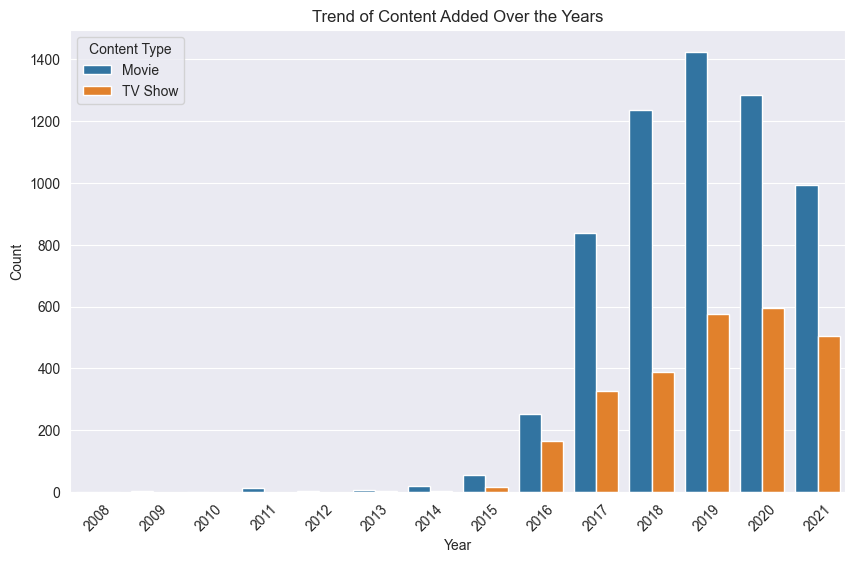

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
netflix_df = pd.read_csv("netflix_dataset.csv")

# Drop rows with missing date_added values
netflix_df = netflix_df.dropna(subset=['date_added'])

# Convert date_added column to datetime with custom format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce')

# Drop rows where conversion fails
netflix_df = netflix_df.dropna(subset=['date_added'])

# Extract year from date_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

# Plot the trend of content added over the years
plt.figure(figsize=(10, 6))
sns.countplot(x='year_added', hue='type', data=netflix_df)
plt.title('Trend of Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

### Patterns:
- There are significantly more movies than TV shows trending every year according to the dataset.
- In 2019 the number of movies trending was maximized (more than 1400).
- In 2020 the number of TV shows trending was maximized (around 600).
- The trending number of movies was growing till 2019 and then began to fall hitting almost 1000 in 2021
- The trending number of TV shows was growing till 2020 and then began falling hitting around 500 in 2021

### Insights:
- This could indicate that people prefer movies to TV shows making them more trendy each year

## 2. Release Year Analysis. Investigate the distribution of content by release year.

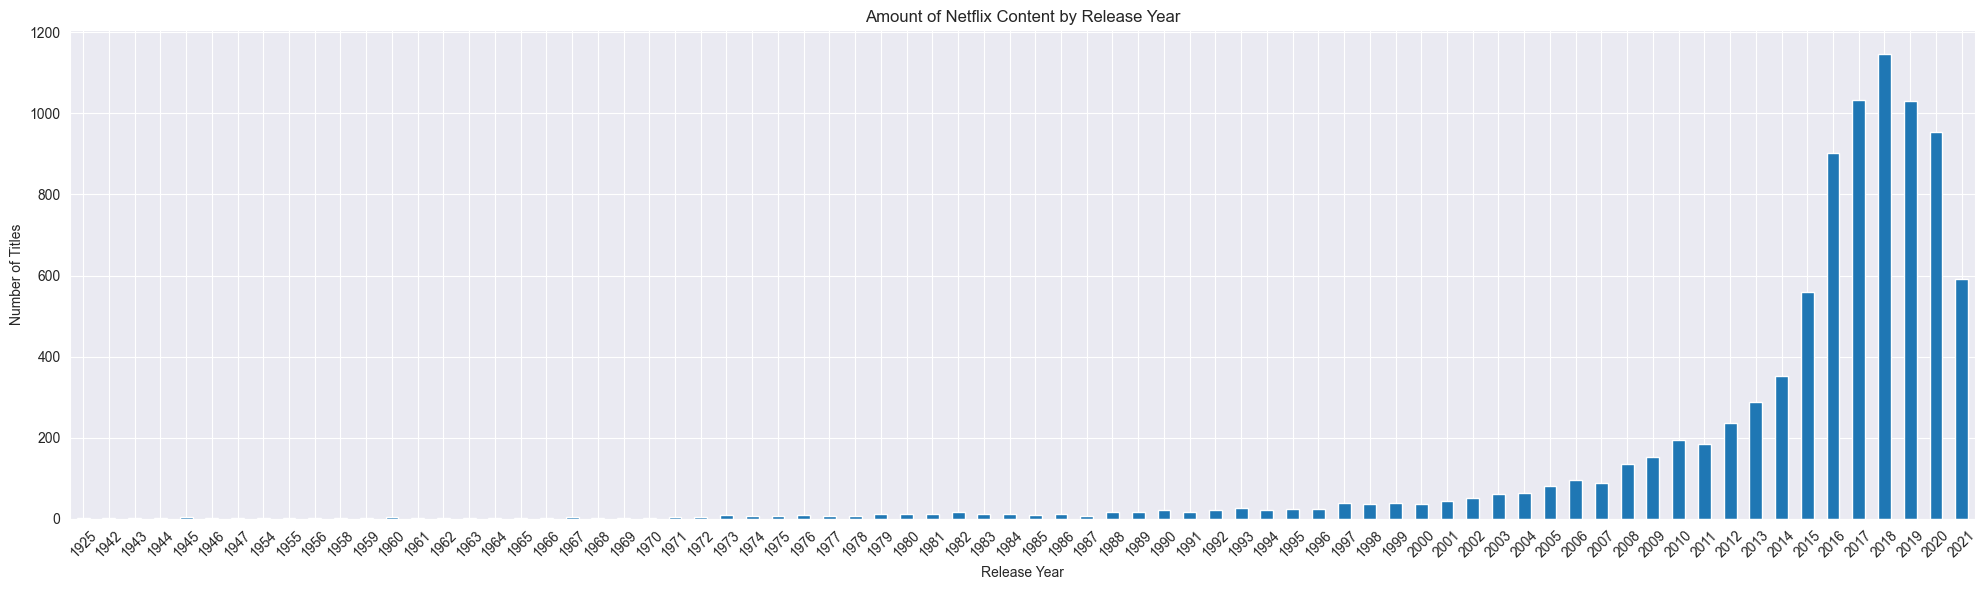

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Plot distribution of content by release year
plt.figure(figsize=(20, 6))
netflix_data['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Amount of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! знизу

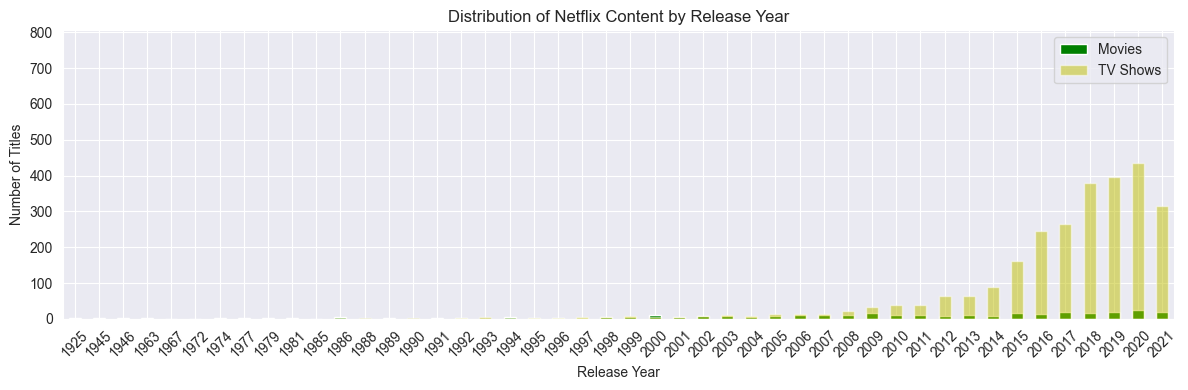

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Filter movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Group by release year and type
movies_by_year = movies.groupby('release_year').size()
tv_shows_by_year = tv_shows.groupby('release_year').size()

# Plot distribution of movies and TV shows by release year
plt.figure(figsize=(12, 4))

movies_by_year.plot(kind='bar', color='g', label='Movies')
tv_shows_by_year.plot(kind='bar', color='y', label='TV Shows', alpha=0.5)  # Set alpha to adjust transparency

plt.title('Distribution of Netflix Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Patterns:
- The content was being released in relatively constantly growing numbers with years passing. But there are some falls in 2008, 2012 and 2020
- There is a high pick in 2021

### Insights:
- Looking at the diagram it is possible to assume that the demand and financing was growing through the years resulting in higher release numbers
- Remembering the Covid times of 2020 it is logical to say that the fall in content-release of 2020 and 2021 was due to those events

## Identify trends in the production of new content over the years

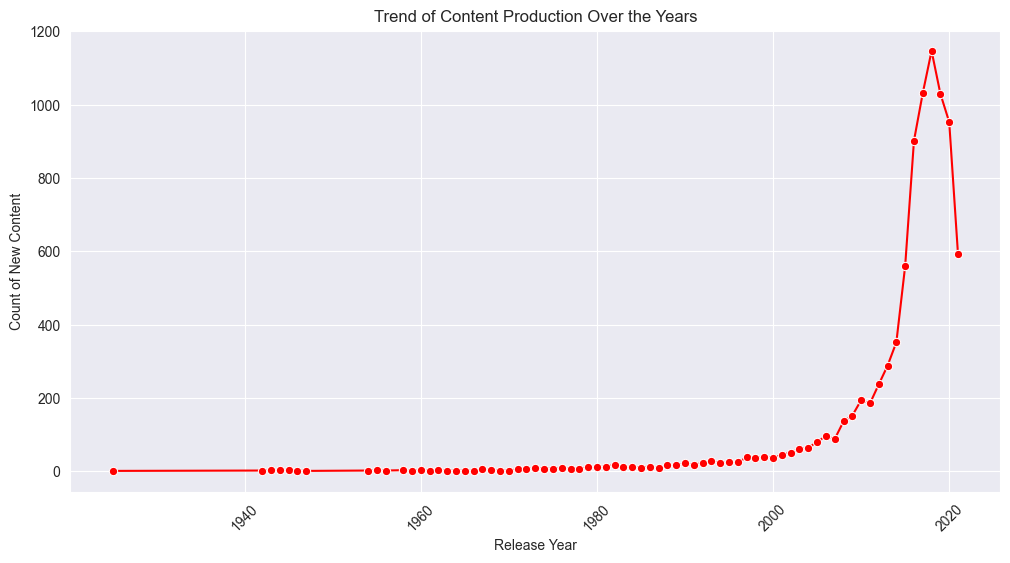

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("netflix_dataset.csv")
# Group the dataset by release year and count the number of content releases for each year
content_by_year = netflix_df.groupby('release_year').size().reset_index(name='count')

# Plot the trend of content production over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='count', data=content_by_year, marker='o', color='red')
plt.title('Trend of Content Production Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count of New Content')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

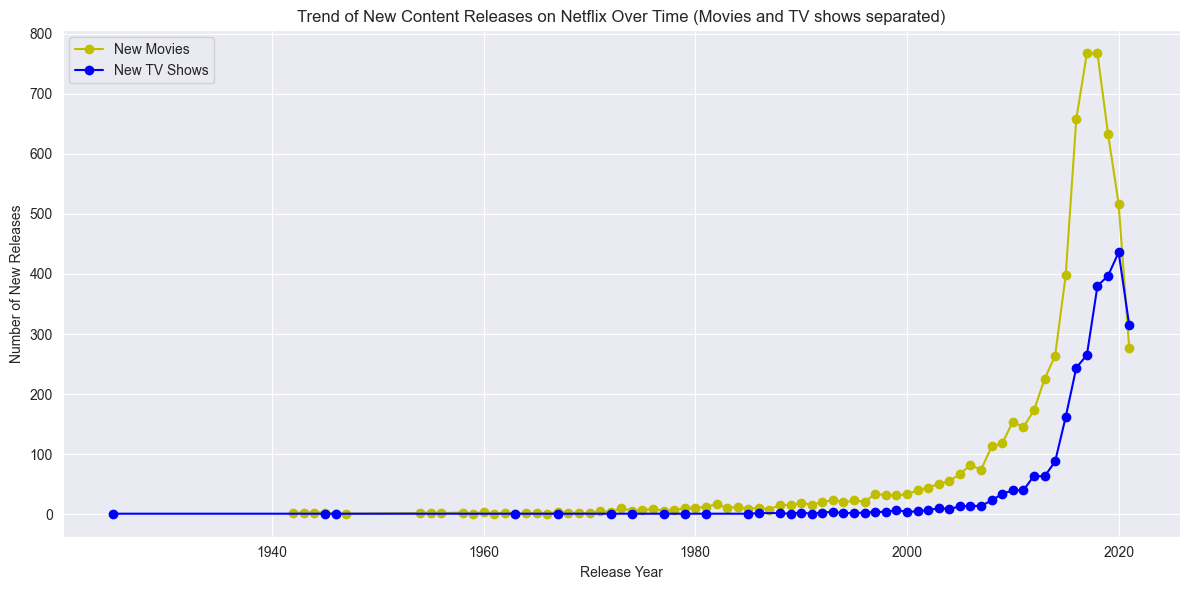

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
netflix_data = pd.read_csv('netflix_dataset.csv')

# Filter movies and TV shows
movies = netflix_data[netflix_data['type'] == 'Movie']
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Calculate number of new movie releases each year
new_movies_by_year = movies.groupby('release_year').size()

# Calculate number of new TV show releases each year
new_tv_shows_by_year = tv_shows.groupby('release_year').size()

# Plot trend of new content releases over time
plt.figure(figsize=(12, 6))

new_movies_by_year.plot(kind='line', marker='o', color='y', label='New Movies')
new_tv_shows_by_year.plot(kind='line', marker='o', color='b', label='New TV Shows')

plt.title('Trend of New Content Releases on Netflix Over Time (Movies and TV shows separated)')
plt.xlabel('Release Year')
plt.ylabel('Number of New Releases')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()